In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
img = cv2.imread('tempsnip.png')

In [67]:
def display(img, cmap=None):
    fig = plt.figure(figsize=(10,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap=cmap)

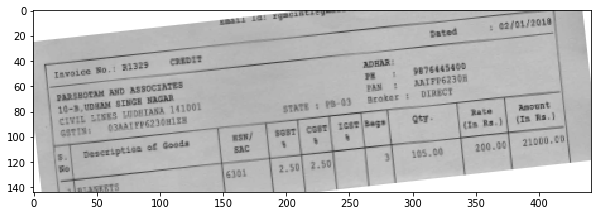

In [68]:
display(img)

In [70]:
def correct(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    
    ret,thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#     display(thresh, cmap='gray')
    
    coords = np.column_stack(np.where(thresh>0))
#     print(coords)
    angle = cv2.minAreaRect(coords)[-1]

    
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h),
        flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    display(rotated)

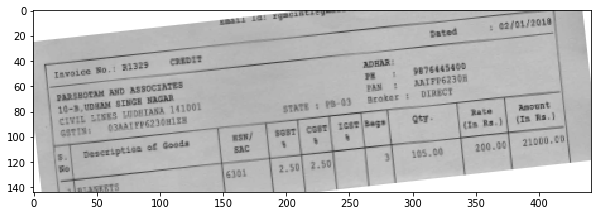

In [71]:
correct(img)